In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [6]:
annotation = {
    "IMG0000777.jpg": {
        "fileref": "",
        "size": 17685,
        "filename": "IMG0000777.jpg",
        "base64_img_data": "",
        "file_attributes": {},
        "regions": {
            "0": {
                "shape_attributes": {
                    "name": "polygon",
                    "all_points_x": [
                        234.2502054231717,
                        279.01602300739523,
                        280.1351684470008,
                        231.26581758422347,
                        234.2502054231717
                    ],
                    "all_points_y": [
                        74.60969597370584,
                        98.11175020542318,
                        69.38701725554643,
                        37.67789646672145,
                        74.60969597370584
                    ]
                },
                "region_attributes": {
                    "label": "fractured"
                }
            }
        }
    }
}


In [8]:

image_path = r"D:\FracAtlas_extracted\FracAtlas\images\Fractured\IMG0000777.jpg"
img_bgr = cv2.imread(image_path)
if img_bgr is None:
    raise FileNotFoundError(f"Image not found at {image_path}") 

image = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
height, width = image.shape[:2]

mask = np.zeros((height, width), dtype=np.uint8)
print(mask)


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [9]:
regions = annotation["IMG0000777.jpg"]["regions"]
for region in regions.values():
   shape_attr = region["shape_attributes"]
   label = region['region_attributes'].get('label', 'unknown')
   
   if shape_attr["name"] == "polygon":
       all_x = shape_attr["all_points_x"]
       all_y = shape_attr["all_points_y"]
       
       polygon = np.array(list(zip(all_x, all_y)), dtype=np.int32)
       polygon = polygon.reshape((-1, 1 , 2))
       
       mask = cv2.fillPoly(mask, [polygon], 1)
       

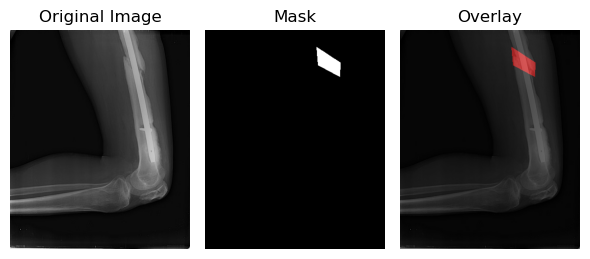

In [11]:
colored_mask = np.zeros_like(image)
colored_mask[mask == 1] = [255, 0, 0]  # Red color for the mask
alpha = 0.5  # Transparency factor
overlay = cv2.addWeighted(image, 1 - alpha, colored_mask, alpha, 0)

plt.figure(figsize=(6, 6))

plt.subplot(1,3,1)
plt.imshow(image)
plt.title("Original Image")
plt.axis("off")


plt.subplot(1,3,2)
plt.imshow(mask, cmap='gray')
plt.title("Mask")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(overlay)
plt.title("Overlay")
plt.axis("off")

plt.tight_layout()
plt.show()